In [1]:
import cv2
import os, glob
import mediapipe as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import random

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ConvLSTM2D, Dropout, LSTM, Rescaling

In [6]:
orig_img_targ = r'D:\datasets\Celeb_df_as_imgs\Original'
fake_img_targ = r'D:\datasets\Celeb_df_as_imgs\Fake'

In [7]:
orig_dir = r'D:\datasets\Celeb-DF\Celeb-real'
fake_dir = r'D:\datasets\Celeb-DF\Celeb-synthesis'
orig_dir_yt = r'D:\datasets\Celeb-DF\YouTube-real'

In [8]:
orig_files = glob.glob(os.path.join(orig_dir, '*mp4'))
fake_files = glob.glob(os.path.join(fake_dir, '*mp4'))

In [9]:
orig_files_yt = glob.glob(os.path.join(orig_dir_yt, '*mp4'))

In [10]:
print(len(orig_files))
print(len(fake_files))
print(len(orig_files_yt))

158
795
250


In [11]:
orig_files = orig_files+orig_files_yt

In [12]:
print(len(orig_files))
print(len(fake_files))

408
795


In [13]:
trial_orig = orig_files[:200]
trial_fakes = fake_files[:200]

In [42]:
def extract_faces_from_video(video_path, output_directory='output_faces'):
    # Initialize MediaPipe Face Detection
    mp_face_detection = mp.solutions.face_detection
    face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Check if the video file opened successfully
    if not video_capture.isOpened():
        print("Error: Unable to open video file.")
        return None

    # Create a directory to save the face images
    # os.makedirs(output_directory, exist_ok=True)
    # path_list = []
    # Loop through each frame of the video
    frames = []
    
    frame_count = 0
    while True:
        # Read the current frame
        ret, frame = video_capture.read()

        # If there are no more frames, break out of the loop
        if not ret:
            break

        # Convert the frame to RGB (MediaPipe requires RGB input)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Perform face detection
        results = face_detection.process(frame_rgb)
        if len(frames) <10:
        # Draw bounding boxes around the detected faces
            if results.detections:
                for detection in results.detections:
                    # Get the bounding box coordinates
                    bboxC = detection.location_data.relative_bounding_box
                    ih, iw, _ = frame.shape
                    x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                                 int(bboxC.width * iw), int(bboxC.height * ih)
    
                    # Calculate expanded bounding box dimensions
                    head_width = int(w * 1.5)  
                    head_height = int(h * 1.5)  
    
                    # Adjust bounding box position to ensure it remains within frame boundaries
                    x = max(0, x - (head_width - w) // 2)
                    y = max(0, y - (head_height - h) // 2)
                    head_width = min(iw - x, head_width)
                    head_height = min(ih - y, head_height)
    
                    # Crop the bounding box from the frame
                    face_image = frame[y:y + head_height, x:x + head_width]
                    face_image = cv2.resize(face_image, (80, 80))
                    # Save the cropped face image
                    # face_filename = os.path.join(output_directory, f'face_{frame_count}.jpg')
                    # cv2.imwrite(face_filename, face_image)
                    # path_list.append(face_filename)
                    frames.append(face_image)
        
                # Increment the frame count for naming the next face image
        frame_count += 1

    # Release the video capture object and close all windows
    video_capture.release()
    cv2.destroyAllWindows()
    print("frames = ", frame_count)
    # return output_directory
    return frames


In [16]:
a = extract_faces_from_video(trial_fakes[0])

frames =  469


In [17]:
print(a)

[array([[[  0,   0,  60],
        [  0,   0,  63],
        [  0,   1,  67],
        ...,
        [ 28,  54, 105],
        [ 52,  83, 119],
        [112, 147, 171]],

       [[  0,   0,  61],
        [  0,   1,  64],
        [  0,   3,  69],
        ...,
        [  9,  24, 125],
        [ 16,  37, 114],
        [125, 157, 195]],

       [[  0,   0,  61],
        [  0,   1,  64],
        [  0,   3,  69],
        ...,
        [  8,  24, 129],
        [ 13,  33, 115],
        [117, 149, 188]],

       ...,

       [[ 21,  37,  52],
        [ 18,  34,  49],
        [ 29,  46,  60],
        ...,
        [ 13,  29,  38],
        [ 13,  30,  39],
        [ 13,  30,  39]],

       [[ 11,  26,  37],
        [ 13,  27,  38],
        [ 22,  37,  48],
        ...,
        [ 11,  28,  37],
        [ 11,  28,  37],
        [ 11,  28,  37]],

       [[ 10,  22,  32],
        [ 10,  22,  32],
        [  9,  21,  31],
        ...,
        [ 11,  28,  37],
        [ 11,  28,  37],
        [ 11,  28,  37]

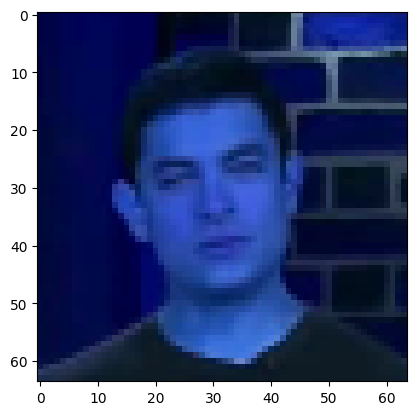

In [18]:
plt.imshow(a[4])

In [31]:
len(a)

10

In [20]:
trial_orig_video_frames = []

for i in range(150):
    frames_i = extract_faces_from_video(trial_orig[i])
    trial_orig_video_frames.append(frames_i)
    print(i , ' done')

frames =  469
0  done
frames =  303
1  done
frames =  350
2  done
frames =  529
3  done
frames =  326
4  done
frames =  459
5  done
frames =  534
6  done
frames =  479
7  done
frames =  464
8  done
frames =  520
9  done
frames =  239
10  done
frames =  145
11  done
frames =  322
12  done
frames =  351
13  done
frames =  517
14  done
frames =  318
15  done
frames =  172
16  done
frames =  502
17  done
frames =  380
18  done
frames =  535
19  done
frames =  373
20  done
frames =  441
21  done
frames =  357
22  done
frames =  313
23  done
frames =  350
24  done
frames =  327
25  done
frames =  316
26  done
frames =  320
27  done
frames =  371
28  done
frames =  397
29  done
frames =  330
30  done
frames =  376
31  done
frames =  398
32  done
frames =  364
33  done
frames =  379
34  done
frames =  339
35  done
frames =  314
36  done
frames =  308
37  done
frames =  327
38  done
frames =  349
39  done
frames =  400
40  done
frames =  340
41  done
frames =  352
42  done
frames =  309
43  don

In [21]:
for i in range(len(trial_orig_video_frames)):
    if len(trial_orig_video_frames[i]) !=10:
        print(i, len(trial_orig_video_frames[i]))

In [36]:
trial_orig_video_frames.pop(145)

[array([[[ 40,  77, 168],
         [ 40,  77, 169],
         [ 40,  76, 171],
         ...,
         [ 47,  85, 187],
         [ 48,  87, 189],
         [ 48,  87, 189]],
 
        [[ 37,  77, 167],
         [ 40,  77, 171],
         [ 40,  77, 171],
         ...,
         [ 47,  85, 187],
         [ 49,  87, 189],
         [ 49,  87, 189]],
 
        [[ 39,  76, 167],
         [ 41,  77, 172],
         [ 41,  77, 172],
         ...,
         [ 48,  86, 188],
         [ 49,  87, 189],
         [ 49,  87, 189]],
 
        ...,
 
        [[ 58, 100, 183],
         [ 62, 100, 183],
         [ 61, 100, 183],
         ...,
         [ 93,  30,   7],
         [ 86,  33,   1],
         [ 83,  31,   1]],
 
        [[ 63, 105, 177],
         [ 72, 105, 176],
         [ 70, 105, 177],
         ...,
         [ 91,  30,   8],
         [ 87,  33,   2],
         [ 83,  31,   1]],
 
        [[ 88, 122, 170],
         [ 80, 112, 164],
         [ 57,  92, 149],
         ...,
         [ 86,  33,   8],
  

In [22]:
trial_orig_video_frames = np.array(trial_orig_video_frames)

In [23]:
trial_orig_video_frames.shape

(50, 10, 64, 64, 3)

In [24]:
trial_fake_video_frames = []

for i in range(50):
    frames_i = extract_faces_from_video(trial_fakes[i])
    trial_fake_video_frames.append(frames_i)
    print(i , ' done')

frames =  469
0  done
frames =  303
1  done
frames =  350
2  done
frames =  529
3  done
frames =  326
4  done
frames =  459
5  done
frames =  534
6  done
frames =  479
7  done
frames =  464
8  done
frames =  520
9  done
frames =  469
10  done
frames =  303
11  done
frames =  350
12  done
frames =  529
13  done
frames =  459
14  done
frames =  534
15  done
frames =  479
16  done
frames =  520
17  done
frames =  469
18  done
frames =  303
19  done
frames =  350
20  done
frames =  529
21  done
frames =  459
22  done
frames =  534
23  done
frames =  479
24  done
frames =  520
25  done
frames =  469
26  done
frames =  303
27  done
frames =  350
28  done
frames =  529
29  done
frames =  326
30  done
frames =  459
31  done
frames =  534
32  done
frames =  479
33  done
frames =  464
34  done
frames =  520
35  done
frames =  469
36  done
frames =  303
37  done
frames =  350
38  done
frames =  529
39  done
frames =  326
40  done
frames =  459
41  done
frames =  534
42  done
frames =  479
43  don

In [ ]:
# trial_fake_video_frames = trial_fake_video_frames[:80]

In [26]:
for i in range(len(trial_fake_video_frames)):
    if len(trial_fake_video_frames[i]) !=10:
        print(i, len(trial_fake_video_frames[i]))

In [43]:
trial_fake_video_frames.pop(92)

[array([[[  8,  14,  33],
         [  8,  14,  33],
         [  9,  16,  27],
         ...,
         [ 13,  16,  34],
         [  7,  15,  37],
         [  7,  15,  37]],
 
        [[  9,  13,  29],
         [  9,  13,  29],
         [  9,  13,  29],
         ...,
         [ 12,  16,  37],
         [ 12,  15,  38],
         [ 12,  15,  38]],
 
        [[  9,  13,  29],
         [  9,  13,  29],
         [  9,  13,  29],
         ...,
         [ 12,  16,  37],
         [ 12,  15,  38],
         [ 12,  15,  38]],
 
        ...,
 
        [[  7,  12,  30],
         [  7,  13,  29],
         [  9,  14,  32],
         ...,
         [ 14,  42, 106],
         [ 15,  36,  88],
         [  6,  24,  72]],
 
        [[  9,  13,  34],
         [  9,  14,  32],
         [ 12,  16,  37],
         ...,
         [ 22,  50, 114],
         [ 24,  51, 110],
         [ 22,  46, 102]],
 
        [[ 15,  18,  41],
         [ 15,  19,  40],
         [ 15,  18,  41],
         ...,
         [ 21,  49, 112],
  

In [27]:
trial_fake_video_frames = np.array(trial_fake_video_frames)

In [28]:
trial_fake_video_frames.shape

(50, 10, 64, 64, 3)

In [29]:
trial_fake_video_frames = np.concatenate((trial_fake_video_frames, trial_orig_video_frames), axis=0)

In [30]:
trial_fake_y = np.array([0 for i in range(50)])
trial_orig_y = np.array([1 for i in range(50)])

In [31]:
trial_fake_y  = np.concatenate((trial_fake_y, trial_orig_y), axis=0)

In [32]:
file_path = 'X_test_64.npy'

np.save(file_path, trial_fake_video_frames)

In [33]:
file_path = 'Y_test_64.npy'

np.save(file_path, trial_fake_y)

In [4]:
X_train = np.load('X_train_298.npy')
Y_train = np.load('Y_train_298.npy')

In [5]:
batch_size = 2

In [6]:
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Rescaling



In [8]:

# Define the input shape
input_shape = (10, 64, 64, 3) 
# Define the number of classes
num_classes = 2  # Example number of classes

# Create the Sequential model
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=input_shape))
# Add Conv3D layers
model.add(Conv3D(32, kernel_size=(2, 2, 2), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 10, 80, 80, 3)     0         
                                                                 
 conv3d_3 (Conv3D)           (None, 9, 79, 79, 32)     800       
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 9, 39, 39, 32)    0         
 3D)                                                             
                                                                 
 conv3d_4 (Conv3D)           (None, 7, 37, 37, 64)     55360     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 7, 18, 18, 64)    0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 5, 16, 16, 128)   

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(X_train, Y_train, batch_size=2, epochs=20)

Epoch 1/20
148/148 [==============================] - 5s 16ms/step - loss: 0.7651 - accuracy: 0.4662
Epoch 2/20
148/148 [==============================] - 2s 16ms/step - loss: 0.6952 - accuracy: 0.4595
Epoch 3/20
148/148 [==============================] - 2s 15ms/step - loss: 0.7056 - accuracy: 0.5101
Epoch 4/20
148/148 [==============================] - 2s 15ms/step - loss: 0.6941 - accuracy: 0.4865
Epoch 5/20
148/148 [==============================] - 2s 15ms/step - loss: 0.6941 - accuracy: 0.4628
Epoch 6/20
148/148 [==============================] - 2s 15ms/step - loss: 0.6953 - accuracy: 0.4966
Epoch 7/20
148/148 [==============================] - 2s 16ms/step - loss: 0.7423 - accuracy: 0.5270
Epoch 8/20
148/148 [==============================] - 2s 15ms/step - loss: 0.6946 - accuracy: 0.4730
Epoch 9/20
148/148 [==============================] - 2s 15ms/step - loss: 0.6936 - accuracy: 0.4764
Epoch 10/20
148/148 [==============================] - 2s 15ms/step - loss: 0.6948 - accura

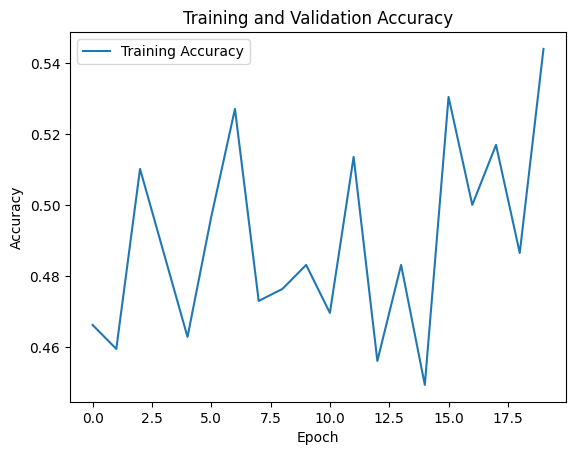

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy if available
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [93]:
model.save(r'D:\85_accuracy_3_lay')

INFO:tensorflow:Assets written to: D:\85_accuracy_3_lay\assets


INFO:tensorflow:Assets written to: D:\85_accuracy_3_lay\assets


In [6]:
X_train = np.load('X_train_298.npy')
Y_train = np.load('Y_train_298.npy')

In [36]:
X_test = np.load('X_test_64.npy')
Y_test = np.load('Y_test_64.npy')

In [37]:
# Load the model with custom objects
loaded_model = tf.keras.models.load_model(r'D:\85_accuracy_3_lay')


In [38]:
loaded_model.evaluate(X_test, Y_test)

4/4 [==============================] - 4s 48ms/step - loss: 0.2360 - accuracy: 0.9100


[0.23595869541168213, 0.9100000262260437]

In [39]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 10, 64, 64, 3)     0         
                                                                 
 conv3d (Conv3D)             (None, 8, 62, 62, 32)     2624      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 4, 31, 31, 32)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 2, 29, 29, 64)     55360     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 1, 14, 14, 64)    0         
 3D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)            

In [40]:
Y_pred = loaded_model.predict(X_test)

4/4 [==============================] - 0s 99ms/step


In [41]:
Y_lab = [np.argmax(i) for i in Y_pred]

In [43]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_lab)

In [44]:
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       1.00      0.82      0.90        50

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100

